In [ ]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy


fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

In [ ]:
#Set Constants Here
dt = 0.001

#Model Parameters
a = 0.02
b = 0.25
c = -50 # reset voltage
d = 2 #refactory period ish

#Initial Values
v0 = -70
u0 = -20


spike_threshold = -40

In [ ]:
def SimulateIzhikevichNeuron(I, T0):
  #Make empty arrays for the simulations
  T = int(T0/dt)
  t = np.arange(0,T)*dt
  v = np.zeros(T)
  u = np.zeros(T)
  rec_spikes = []
  
  v[0] = v0
  u[0] = u0

  for i in range(0,T-1):
    
    if v[i] > 30:
      v[i+1] = c
      u[i+1] = u[i] + d
    else:
      v[i+1] = v[i] + dt*(0.04*v[i]**2 +5*v[i] + 140 - u[i]+I(t[i]))
      u[i+1] = u[i] + dt*(a*(b*v[i]-u[i]))
      if v[i+1] >= spike_threshold and v[i] < spike_threshold:
        rec_spikes.append(i*dt)
    
  return v,u,t, rec_spikes



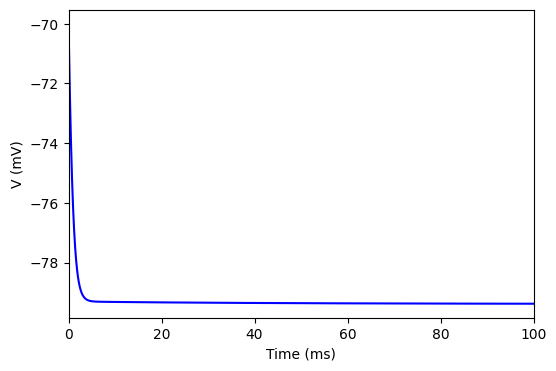

In [ ]:
def I(t):
  return -15

V,u,t, spikes = SimulateIzhikevichNeuron(I,100)

plt.plot(t,V,'b')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)');
plt.xlim(0,100)
plt.savefig("Izhikevich-15.pdf")



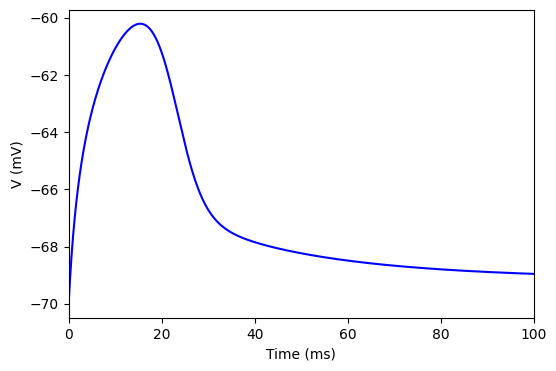

In [ ]:
def I(t):
  return -2.8

V,u,t, spikes = SimulateIzhikevichNeuron(I,100)

plt.plot(t,V,'b')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)');
plt.xlim(0,100)
plt.savefig("Izhikevich-2.8.pdf")


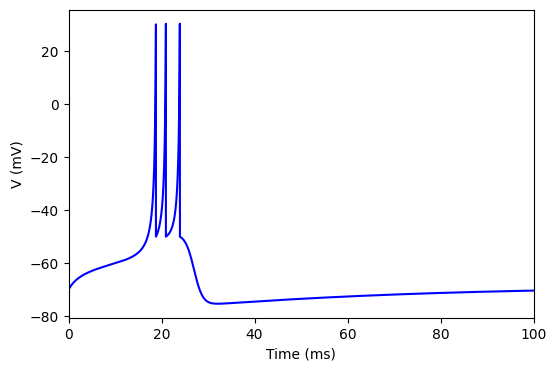

In [ ]:
def I(t):
  return -2.7

V,u,t, spikes = SimulateIzhikevichNeuron(I,100)

plt.plot(t,V,'b')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)');
plt.xlim(0,100)
plt.savefig("Izhikevich-2.7.pdf")



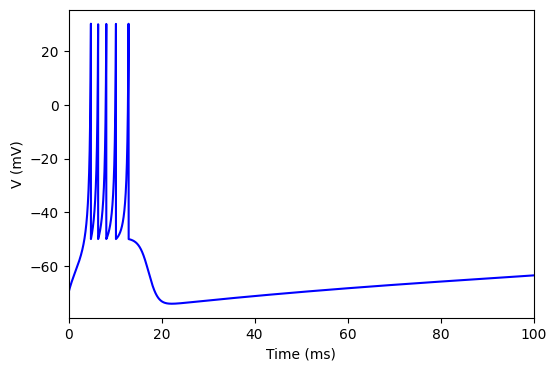

In [ ]:
def I(t):
  return 1

V,u,t, spikes = SimulateIzhikevichNeuron(I,100)

plt.plot(t,V,'b')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)');
plt.xlim(0,100)
plt.savefig("Izhikevich1.pdf")


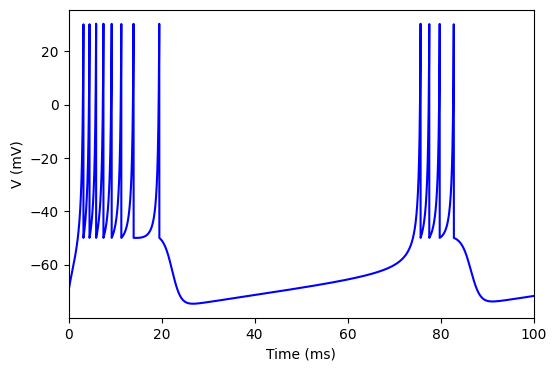

In [ ]:
def I(t):
  return 5

V,u,t, spikes = SimulateIzhikevichNeuron(I,100)

plt.plot(t,V,'b')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)');
plt.xlim(0,100)
plt.savefig("Izhikevich5.pdf")



In [ ]:
I0 = 0
avg_rate = []


def I(t): #constantcurrent function
  return I0

Iarray = np.linspace(-5,5,1000)
for current in Iarray:
  I0 = current
  V,u,t, spikes = SimulateIzhikevichNeuron(I,1000)
  avg_rate.append(len(spikes))


plt.plot(Iarray, avg_rate)
plt.xlabel('Current ($\mu$A)')
plt.ylabel('Spike Count');
plt.xlim(-15,5)
plt.ylim(0,)

plt.savefig("IzhikevichFICurve.pdf")


KeyboardInterrupt: ignored

In [ ]:
plt.plot(Iarray, avg_rate)
plt.xlabel('Current ($\mu$A)')
plt.ylabel('Spike Count');
plt.xlim(-15,5)
plt.ylim(0,)

plt.savefig("IzhikevichFICurve.pdf")


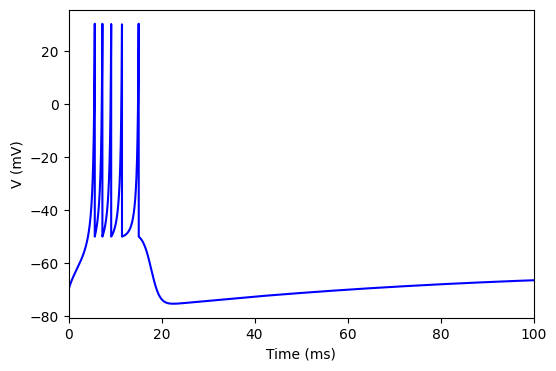

In [ ]:
np.random.seed()

Sig = 0
I0 = 0.01

def I(t): #noisy current
  return I0 + Sig * np.random.randn()


V,u,t, spikes = SimulateIzhikevichNeuron(I,100)

plt.plot(t,V,'b')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)');
plt.xlim(0,100)
plt.savefig("0noisyIz0.01.pdf")

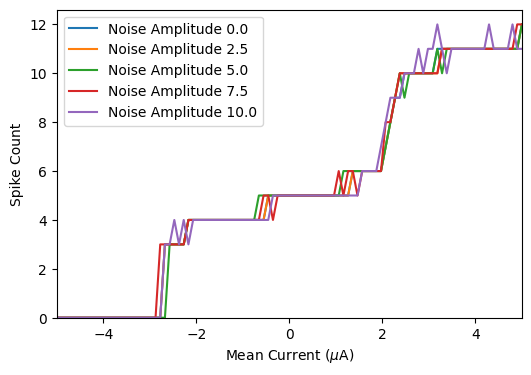

In [ ]:
I0 = 0
std = 0
np.random.seed()

def I(t): #noisy current
  return I0 + std * np.random.randn()

Iarray = np.linspace(-5,5,100)
stdarray = np.linspace(0,10,5)
for sig in stdarray:
  avg_rate = []
  for current in Iarray:
    I0 = current
    std = sig
    V,u,t, spikes = SimulateIzhikevichNeuron(I,100)
    avg_rate.append(len(spikes))
  plt.plot(Iarray, avg_rate, label = 'Noise Amplitude ' + str(std))
  plt.xlim(-5,5)
  plt.ylim(0,)
  plt.ylim(0,)

plt.xlabel('Mean Current ($\mu$A)')
plt.ylabel('Spike Count')
plt.legend()
plt.savefig("IzhikevichFICurvewithNoise.pdf")